# Neural Network - A Simple Perceptron | Assignment

**Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.**

Deep Learning is a subset of Machine Learning that uses artificial neural networks with many layers (hence “deep”) to automatically learn complex patterns and representations from large amounts of data. It mimics the human brain’s way of processing information, making it highly effective for tasks like image recognition, speech processing, and natural language understanding.

Deep learning evolved from traditional neural networks developed in the 1980s and 1990s but gained momentum in the 2010s due to the availability of big data, powerful GPUs, and improvements in algorithms like ReLU activation, dropout, and backpropagation.

Unlike traditional machine learning, which often relies on manual feature extraction, deep learning automatically learns features directly from raw data. This makes it more powerful for handling complex and unstructured data, though it requires more computational resources and larger datasets.

**Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?**

 A Perceptron is the simplest type of artificial neural network, consisting of a single neuron. It takes multiple input values, multiplies each by a corresponding weight, adds them up along with a bias, and then passes the result through an activation function (usually a step function) to produce an output.

**Basic architecture:**

Inputs (x₁, x₂, …, xₙ): Features or data points.

Weights (w₁, w₂, …, wₙ): Determine the importance of each input.

Summation and bias: The weighted sum plus a bias term.

Activation function: Decides whether the neuron activates (outputs 1) or not (outputs 0).

**Functioning:**

Compute weighted sum:
z=w1x1 +w2x2 +…+wnxn +b

Apply activation function:
y=f(z)

Update weights during training using errors from predictions.

**Limitations:**

Can only solve linearly separable problems (like AND, OR), not non-linear ones (like XOR).

Has limited learning capability and cannot handle complex patterns.

Modern deep learning models overcome these limits using multiple layers of perceptrons (forming neural networks).

**Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions**

The activation function in a neural network introduces non-linearity, helping the model learn complex patterns beyond simple linear relationships. It decides whether a neuron should activate based on its input, allowing deep networks to model real-world data effectively.

The Sigmoid function outputs values between 0 and 1, making it useful for probabilities, but it suffers from the vanishing gradient problem. The Tanh function outputs values between -1 and 1, is zero-centered, and often performs better than Sigmoid but still faces vanishing gradients. The ReLU function outputs the input directly if positive and zero otherwise, making it fast and efficient, though it can cause dead neurons when inputs are negative.

**Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples**

A loss function measures the error between the predicted output and the actual output for a single training example. It helps the model understand how well it is performing on that particular sample. Examples include Mean Squared Error (MSE) for regression and Binary Cross-Entropy for classification.

A cost function, on the other hand, is the average of all loss values across the entire training dataset. It represents the overall performance of the model and is used during optimization to adjust the weights. For example, if MSE is used as a loss function for each sample, the average MSE over all samples becomes the cost function.

In short, the loss function measures individual error, while the cost function measures the total or average error for the model.

**Question 5: What is the role of optimizers in neural networks?** **Compare** **Gradient** **Descent, Adam, and RMSprop**

The optimizer in a neural network adjusts the model’s weights and biases to minimize the cost function and improve accuracy. It determines how the model learns from errors during training by updating parameters in the right direction and with the right magnitude.

Gradient Descent updates weights by moving in the direction of the negative gradient of the cost function. It is simple but can be slow and may get stuck in local minima.

RMSprop adapts the learning rate for each parameter by considering recent gradient magnitudes. It works well for non-stationary data and faster convergence.

Adam (Adaptive Moment Estimation) combines the advantages of both RMSprop and Momentum. It adapts learning rates and keeps track of past gradients, making it faster and more stable for large and complex datasets.

In short, while Gradient Descent is basic and reliable, RMSprop and Adam are more efficient and commonly used in deep learning.

In [2]:
# Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.
import numpy as np

# AND gate dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected output for AND gate
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 10

# Activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Training the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)

        # Perceptron update rule
        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print("Final Weights:", weights)
print("Final Bias:", bias)

# Testing
print("\nPredictions:")
for i in range(len(X)):
    linear_output = np.dot(X[i], weights) + bias
    y_pred = step_function(linear_output)
    print(f"Input: {X[i]}, Output: {y_pred}")


Final Weights: [0.2 0.1]
Final Bias: -0.20000000000000004

Predictions:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


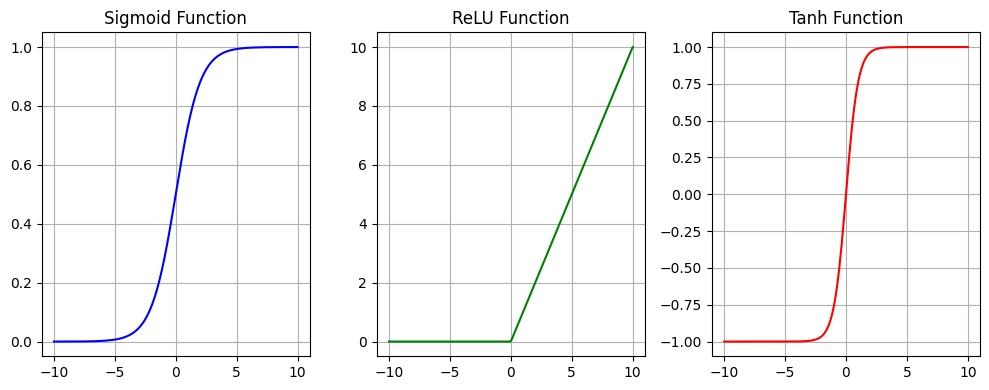

In [3]:
# Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

# Generate input values
x = np.linspace(-10, 10, 200)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot activation functions
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid, color='blue')
plt.title("Sigmoid Function")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x, y_relu, color='green')
plt.title("ReLU Function")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, color='red')
plt.title("Tanh Function")
plt.grid(True)

plt.tight_layout()
plt.show()

In [4]:
# Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255) to (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Convert 2D images to 1D vector
    Dense(128, activation='relu'),      # Hidden layer
    Dense(64, activation='relu'),       # Second hidden layer
    Dense(10, activation='softmax')     # Output layer (10 digits)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)

# Print final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8174 - loss: 0.6293
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9575 - loss: 0.1437
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9724 - loss: 0.0941
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9796 - loss: 0.0670
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9827 - loss: 0.0541

Training Accuracy: 98.31%


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7326 - loss: 0.7734 - val_accuracy: 0.8403 - val_loss: 0.4467
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8575 - loss: 0.4033 - val_accuracy: 0.8613 - val_loss: 0.3890
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8716 - loss: 0.3574 - val_accuracy: 0.8659 - val_loss: 0.3842
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8803 - loss: 0.3315 - val_accuracy: 0.8620 - val_loss: 0.3880
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8874 - loss: 0.3074 - val_accuracy: 0.8710 - val_loss: 0.3562
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8909 - loss: 0.3000 - val_accuracy: 0.8684 - val_loss: 0.3633
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6

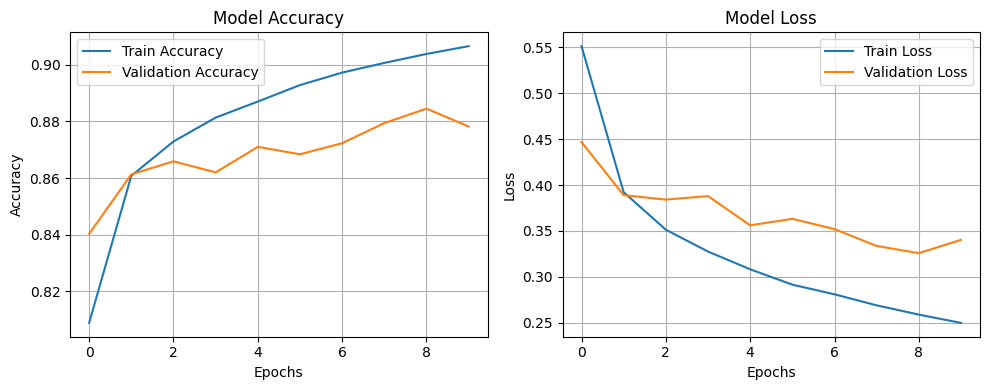

In [5]:
# Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, batch_size=128, verbose=1)

# Plot accuracy and loss curves
plt.figure(figsize=(10,4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions.** **The dataset is large imbalanced, and contains structured features like transaction amount, merchant ID, and customer location.The goal is to** **classify each transaction as fraudulent or legitimate.**

**Explain your real-time data science workflow**:

● **How would you design a deep learning model (perceptron or multilayer NN)?**

● **Which activation function and loss function would you use, and why?**

● **How would you train and evaluate the model, considering class imbalance**?

● **Which optimizer would be suitable, and how would you prevent overfitting?**

**Solutions:**

To design a deep learning model for fraud detection, I would use a multilayer neural network that can learn complex patterns from structured data such as transaction amount, merchant ID, and location. The network would have an input layer for features, two to three hidden layers with ReLU activation, and an output layer with a sigmoid function to predict the probability of fraud.


The ReLU activation function is preferred for hidden layers because it helps faster learning and reduces vanishing gradient issues. The sigmoid function in the output layer is suitable for binary classification as it outputs values between 0 and 1. The binary cross-entropy loss function would be used to measure how well the model predicts fraud versus legitimate transactions.


Since the dataset is imbalanced, I would use class weights or focal loss to ensure the model pays more attention to the minority (fraud) class. Evaluation metrics like precision, recall, F1-score, and ROC-AUC would be used instead of accuracy to get a better understanding of performance.


The Adam optimizer would be suitable because it adapts learning rates and performs efficiently on large datasets. To prevent overfitting, I would use dropout layers, L2 regularization, batch normalization, and early stopping during training. Additionally, proper validation and continuous monitoring would ensure good real-time model performance.
